#Insurance Claims Charges Prediction

Download dataset

In [2]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-01-04 09:32:56--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2024-01-04 09:32:57 (4.80 MB/s) - ‘insurance.csv’ saved [55628/55628]



In [3]:
import pandas as pd

data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
import numpy as np
np.mean(data[data["sex"]=='female']["charges"])

12569.578843835347

##STEP-1: Importing Libraries & Data Set

In [5]:
#import basic libraries
import numpy as np #linear algebra
import pandas as pd #data processing, CSV fileI/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()

In [6]:
#Read the Data
df = pd.read_csv('./insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##STEP-2:Exploratory Data Analysis (EDA)

In [7]:
# Descriptive stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Null check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

Text(0.5, 1.0, 'Age vs Charges')

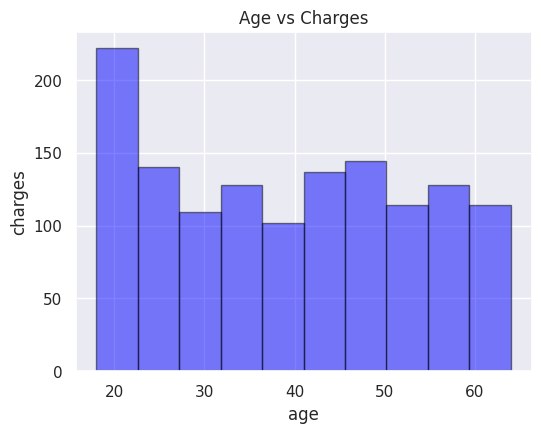

In [10]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.hist(df.age, color='blue', edgecolor='black', alpha = 0.5)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges')

Text(0.5, 1.0, 'Sex vs Charges')

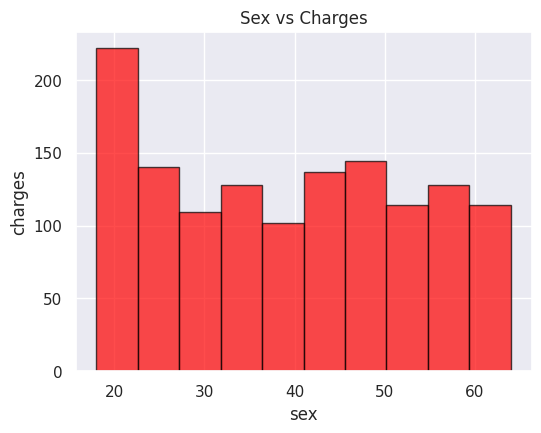

In [11]:
# sex vs charges
# males insurance charges more than females.
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.hist(df.age, color='red', edgecolor='black', alpha = 0.7)
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('Sex vs Charges')

Text(0.5, 1.0, 'Smoker vs Charges')

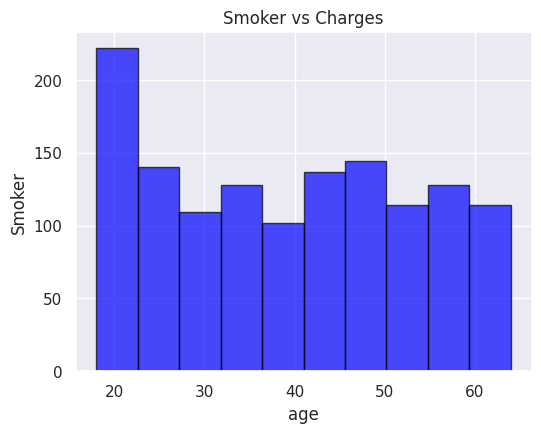

In [12]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.hist(df.age, color='blue', edgecolor='black', alpha = 0.7)
plt.xlabel('age')
plt.ylabel('Smoker')
plt.title('Smoker vs Charges')

Text(0.5, 1.0, 'region vs Charges')

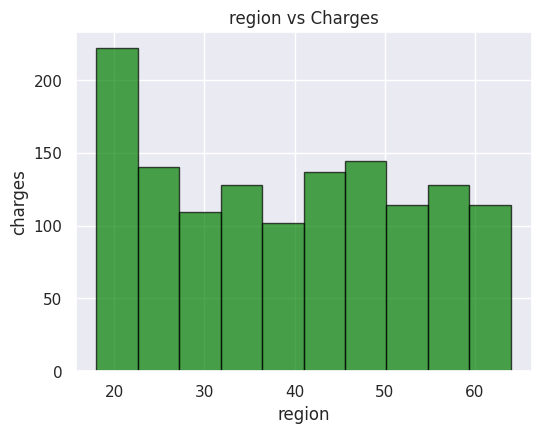

In [13]:
# region vs charges
# region actually does not play any role in determining the insurance charges
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.hist(df.age, color='green', edgecolor='black', alpha = 0.7)
plt.xlabel('region')
plt.ylabel('charges')
plt.title('region vs Charges')

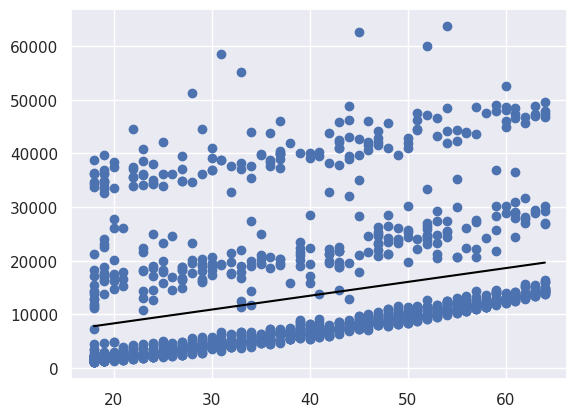

In [14]:
# plotting the correlation plot for the dataset
x = df['age']
y = df['charges']
plt.scatter(x, y)


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='black')

##STEP-3:Data Preprocessing / Clean the Data


In [15]:
# removing unnecassary columns from the dataset
df.head()

print(df.shape)
df.columns

(1338, 7)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
df[['sex', 'smoker']] = df[['sex', 'smoker']].apply(LabelEncoder().fit_transform)
df[['sex', 'smoker']]


,sex,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,0,0
1335,0,0
1336,0,0


In [17]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [18]:
df['sex'].value_counts()
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [19]:
#Selecting Independent (Features) & Dependent(Target) variables
import pandas as pd
df=pd.read_csv("/content/insurance.csv")
print('Columns in the dataset:')
print(df.columns)
features=df[['age','sex','bmi','children','smoker','region']]
target=df['charges']
print(features.head())
print(target.head())

Columns in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
import pandas as pd
df=pd.read_csv("/content/insurance.csv")
features=df[['age','sex','bmi','children','smoker','region']]
target=df['charges']
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)


Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from math import sqrt

# creating the model
model=LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pandas as pd
df=pd.read_csv('/content/insurance.csv')
features=df[['age','sex','bmi','children','smoker','region']]
target=df['charges']
features=pd.get_dummies(features,drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


# feeding the training data to the model
mse=mean_squared_error(y_test,y_pred)

# predicting the test set results

# calculating the mean squared error
rmse=np.sqrt(mse)

# Calculating the root mean squared error


# Calculating the r2 score
r2=r2_score(y_test,y_pred)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("r2 score:",r2)

Mean squared error : 33596915.85136145
Root mean squared error: 5796.284659276273
r2 score: 0.7835929767120724


##Support Vector Machine

In [29]:
from sklearn.svm import SVR
# creating the model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pandas as pd
df=pd.read_csv('/content/insurance.csv')
features=df[['age','sex','bmi','children','smoker','region']]
target=df['charges']
features=pd.get_dummies(features,drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
mse=mean_squared_error(y_test,y_pred)
# Calculating the root mean squared error
rmse=np.sqrt(mse)
# Calculating the r2 score
r2=r2_score(y_test,y_pred)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("r2 score:",r2)

Mean squared error : 165994564.8489911
Root mean squared error: 12883.887800232937
r2 score: -0.06921688347442001


##Decision Tree

In [31]:
# creating the model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pandas as pd
df=pd.read_csv('/content/insurance.csv')
features=df[['age','sex','bmi','children','smoker','region']]
target=df['charges']
features=pd.get_dummies(features,drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
# calculating the mean squared error
mse=mean_squared_error(y_test,y_pred)
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
rmse=np.sqrt(mse)
# Calculating the r2 score
r2=r2_score(y_test,y_pred)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("r2 score:",r2)

Mean squared error : 42446908.010150984
Root mean squared error: 6515.129162967606
r2 score: 0.7265877305258355


##Random Forest

In [34]:
# creating the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pandas as pd
df=pd.read_csv('/content/insurance.csv')
features=df[['age','sex','bmi','children','smoker','region']]
target=df['charges']
features=pd.get_dummies(features,drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
model=RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
mse=mean_squared_error(y_test,y_pred)
# Calculating the root mean squared error
rmse=np.sqrt(mse)
# Calculating the r2 score
r2=r2_score(y_test,y_pred)
print("Mean squared error :",mse)
print("Root mean squared error:",rmse)
print("r2 score:",r2)

Mean squared error : 20942520.922619622
Root mean squared error: 4576.299916157115
r2 score: 0.8651034329144947


Compare and evaluate the Model results and find the best model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
df=pd.read_csv('/content/insurance.csv')
features=df[['age','sex','bmi','children','smoker','region']]
target=df['charges']
features=pd.get_dummies(features,drop_first=True)
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=42)
models=[("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor(random_state=42)),
       ("Support Vector Machine",SVR(kernel='linear')),("Random Forest",RandomForestRegressor(random_state=42))]
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, rmse, r2])
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R-squared'])
print("Model Comparison:")
print(results_df)
best_mse = results_df['MSE'].idxmin()
best_rmse = results_df['RMSE'].idxmin()
best_r2 = results_df['R-squared'].idxmax()
best_model = results_df.loc[[best_mse, best_rmse, best_r2]].iloc[0]
print("\nBest performing models based on metrics:")
print(best_model)

Model Comparison:
                    Model           MSE          RMSE  R-squared
0       Linear Regression  3.359692e+07   5796.284659   0.783593
1           Decision Tree  4.244691e+07   6515.129163   0.726588
2  Support Vector Machine  1.659946e+08  12883.887800  -0.069217
3           Random Forest  2.094252e+07   4576.299916   0.865103

Best performing models based on metrics:
Model         Random Forest
MSE          20942520.92262
RMSE            4576.299916
R-squared          0.865103
Name: 3, dtype: object
